In [21]:
import numpy as np
from sklearn import preprocessing
# Para usar LabelEncoder
le = preprocessing.LabelEncoder()
# Cargar el dataset de hongos
# para cargar los arreglos
ejemplos = []
ejemplos2 = []
# Separacion del archivo agaricus-Lepidota.data (dentro de carpeta Hongos-20220226)
# en caracteristicas y clases por terminal UNIX
# Clases :
# cut -d, -f1 Hongos-20220226/agaricus-lepiota.data > data_clases.data
# Caracteristicas :
# cut -d, -f2-23 Hongos-20220226/agaricus-lepiota.data > data_char.data

# Leer el dataset de caracteristicas, dividirlo por ejemplo y guardarlo 
# en la lista de "ejemplos"
mdata = open("data_char.data", "r")
mdataset = mdata.readlines()
mdata.close()
for line in mdataset:
    final = line.find("\n',")
    prim_lin = line[:final]
    sequence_not = line.find("'", final+1)
    sequence = line[final+1:sequence_not]
    ejemplos.append(sequence)

# Leer el dataset solo con clases, dividirlo por ejemplo y 
# guardarlo en la lista "ejemplos2"
danam = open("data_clases.data", "r")
datanam = danam.readlines()
danam.close()
for line in datanam:
    final2 = line.find("\n',")
    prim_lin2 = line[:final2]
    sequence_not2 = line.find("'", final2+1)
    sequence2 = line[final2+1:sequence_not2]
    ejemplos2.append(sequence2)

# Crear un arreglo 2d con los datos de caracteristicas
arr_2d = np.reshape(ejemplos, (8124,1))
# Comprobar el rearreglo
print(ejemplos[0:4])
print(arr_2d[0:5])
print(ejemplos2[0:4])
# Codificar o pasar las instancias cualitativas de caracteristicas 
# a instancias numericos para poder usar el algoritmo
y2 = le.fit_transform(arr_2d)
# Volver a reacomodar para un arreglo 2d
y22 = np.reshape(y2, (8124,1))
# Corroborar
print(y22[0:23])


['x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u', 'x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g', 'b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m', 'x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u']
[['x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u']
 ['x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g']
 ['b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m']
 ['x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u']
 ['x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g']]
['p', 'e', 'e', 'p']
[[6277]
 [6638]
 [ 216]
 [7825]
 [5908]
 [8028]
 [ 164]
 [ 368]
 [7834]
 [ 236]
 [8072]
 [8031]
 [ 263]
 [7823]
 [5116]
 [4443]
 [1250]
 [6284]
 [7829]
 [6281]
 [ 248]
 [7700]
 [ 435]]


In [22]:
from sklearn.model_selection import train_test_split

# Leemos conjunto de ejemplos
X = y22
print(X[:5])
# Leemos valores de clase para cada ejemplo
y = ejemplos2
print(y[:5])
# Separamos el dataset en dos: entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

[[6277]
 [6638]
 [ 216]
 [7825]
 [5908]]
['p', 'e', 'e', 'p', 'e']


In [29]:
from sklearn.neighbors import KNeighborsClassifier

# Clasificación K Nearest neighbors 
k = 5
# Definición del clasificador
classifier = KNeighborsClassifier(n_neighbors=k)
# Entrenamiento del clasificador con lo datos de entrenamiento y valores de clase para cada ejemplo
classifier.fit(X_train, y_train)
# Predicción con el clasificador entrenado en los datos de evaluación 
y_predict = classifier.predict(X_test)
y_predict

array(['p', 'e', 'e', ..., 'p', 'p', 'p'], dtype='<U1')

In [30]:
# Medidas de rendimiento del clasificador
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("Accuracy: {}".format(accuracy_score(y_test, y_predict)))
print("Precision: {}".format(precision_score(y_test, y_predict, average="macro")))
print("Recall: {}".format(recall_score(y_test, y_predict, average="macro")))
print("F-score: {}".format(f1_score(y_test, y_predict, average="macro")))

Accuracy: 0.9790812141099262
Precision: 0.9791720775168802
Recall: 0.9789165237278444
F-score: 0.9790361780958764


In [31]:
from sklearn.metrics import classification_report

target_names = ['Poisonous', 'Edible']
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

   Poisonous       0.98      0.98      0.98      1272
      Edible       0.98      0.98      0.98      1166

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



[[1250   22]
 [  29 1137]]


c:\users\ol\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


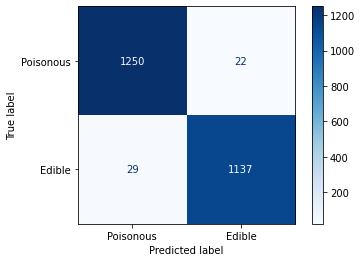

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_test, y_predict))
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues, 
                      display_labels=['Poisonous', 'Edible'])  